# Data science Lab 1

## Cluster-based Classification for Client Errors in Content Delivery Networks (CDN)

### Shahid Gulzar Padder 
###### Neptun id: XPXSKK

### Importing important libraries

In [641]:
import pandas as pd
import numpy as np
import random as rnd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset and describing

In [642]:
dataset = pd.read_csv('CDN Client Error_dataset.csv')# No delimiter like ","or ";"

In [643]:
dataset

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,8,5/13/2088 9:19,156,8,1,NaN,1303,0.0
1,8,5/13/2088 8:58,156,8,1,NaN,1514,0.0
2,8,5/13/2088 9:39,156,2,1,NaN,1,13.0
3,8,5/13/2088 9:54,156,8,1,NaN,1,0.0
4,8,5/13/2088 10:04,156,8,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...
88430,8,5/19/2088 4:18,156,2,1,NaN,1,13.0
88431,2,5/19/2088 1:53,123,4,1,NaN,1121,7.0
88432,8,5/19/2088 3:16,156,8,1,NaN,1,0.0
88433,8,5/19/2088 3:21,156,2,1,NaN,1,13.0


In [644]:
print(dataset.columns.values) # Different feature names

['channel_id' 'timestamp' 'host_id' 'content_type' 'protocol' 'content_id'
 'geo_location' 'user_id']


In [645]:
dataset.shape

(88435, 8)

### EDA 

In [646]:
for column in dataset:
    un_v = np.unique(dataset[column])
    nr_v = len(un_v)
    if nr_v < 10:
        print('No. of val for attribute {} :{} -- {}'.format(column, nr_v,un_v))
    else:
        print('No. of val for attribute {} :{}'.format(column, nr_v))

No. of val for attribute channel_id :8 -- [1 2 3 4 5 6 7 8]
No. of val for attribute timestamp :8032
No. of val for attribute host_id :157
No. of val for attribute content_type :9 -- [0 1 2 3 4 5 6 7 8]
No. of val for attribute protocol :2 -- [0 1]
No. of val for attribute content_id :88420
No. of val for attribute geo_location :1587
No. of val for attribute user_id :329


In [647]:
dataset.isnull().values.any()

True

In [648]:
dataset.isnull().sum(axis = 0)

channel_id          0
timestamp           0
host_id             0
content_type        0
protocol            0
content_id      88409
geo_location        0
user_id           292
dtype: int64

In [649]:
# Different missing values that can be there 
miss_v = ["n/a", "na", "--", "NaN", "NA"]

In [650]:
miss_v

['n/a', 'na', '--', 'NaN', 'NA']

In [651]:
df = pd.read_csv('CDN Client Error_dataset.csv', na_values = miss_v)

In [652]:
df

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,8,5/13/2088 9:19,156,8,1,NaN,1303,0.0
1,8,5/13/2088 8:58,156,8,1,NaN,1514,0.0
2,8,5/13/2088 9:39,156,2,1,NaN,1,13.0
3,8,5/13/2088 9:54,156,8,1,NaN,1,0.0
4,8,5/13/2088 10:04,156,8,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...
88430,8,5/19/2088 4:18,156,2,1,NaN,1,13.0
88431,2,5/19/2088 1:53,123,4,1,NaN,1121,7.0
88432,8,5/19/2088 3:16,156,8,1,NaN,1,0.0
88433,8,5/19/2088 3:21,156,2,1,NaN,1,13.0


In [653]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    88435 non-null  int64  
 1   timestamp     88435 non-null  object 
 2   host_id       88435 non-null  int64  
 3   content_type  88435 non-null  int64  
 4   protocol      88435 non-null  int64  
 5   content_id    26 non-null     float64
 6   geo_location  88435 non-null  int64  
 7   user_id       88143 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.4+ MB


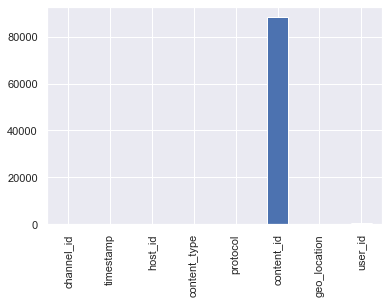

In [654]:
dataset.isnull().sum().plot.bar(x="Features", y="Missing Values")
plt.savefig('Null DS1.png')

In [655]:
dataset.nunique()

channel_id         8
timestamp       8032
host_id          157
content_type       9
protocol           2
content_id        11
geo_location    1587
user_id           37
dtype: int64

In [670]:
print(dataset.duplicated().sum())

67869


In [671]:
dataset=dataset.drop_duplicates()

In [672]:
sns.set(rc={'figure.figsize':(10,6)})

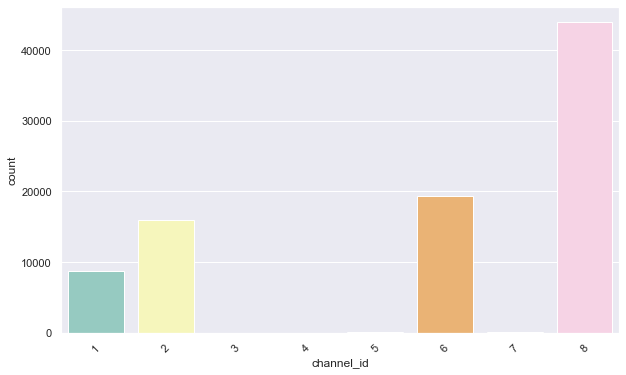

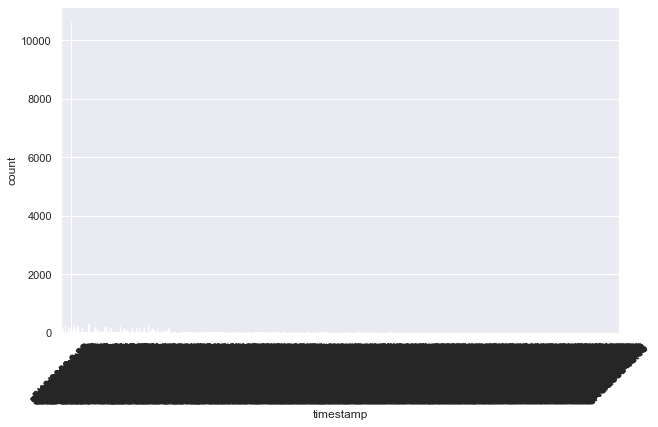

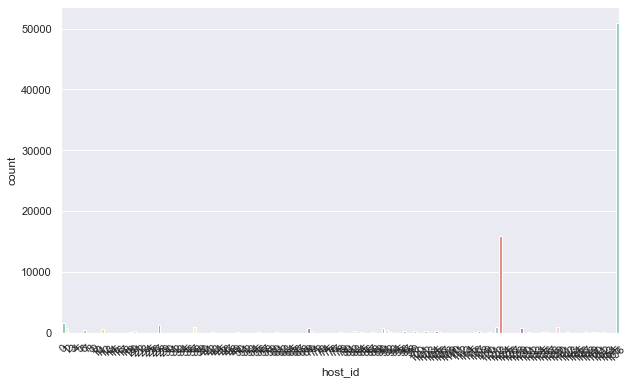

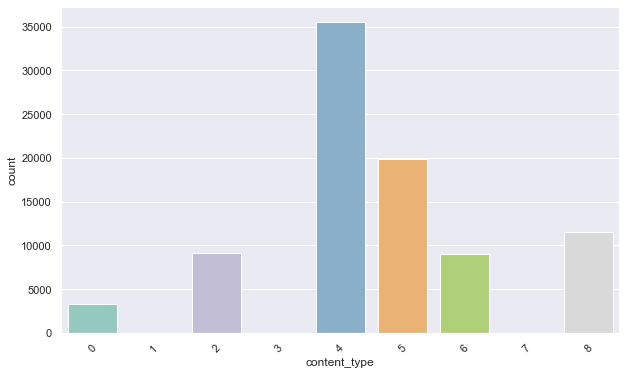

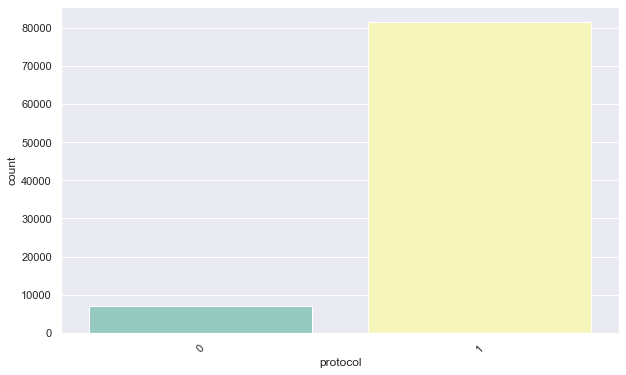

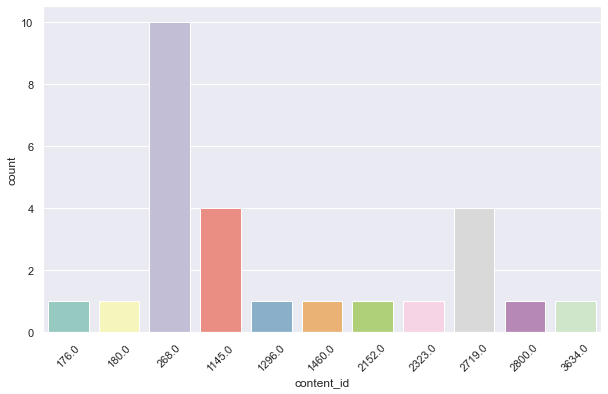

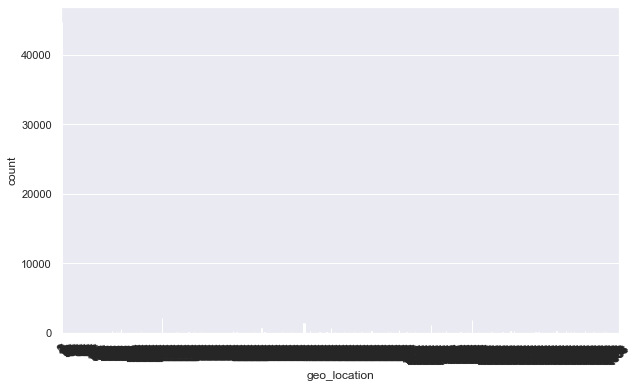

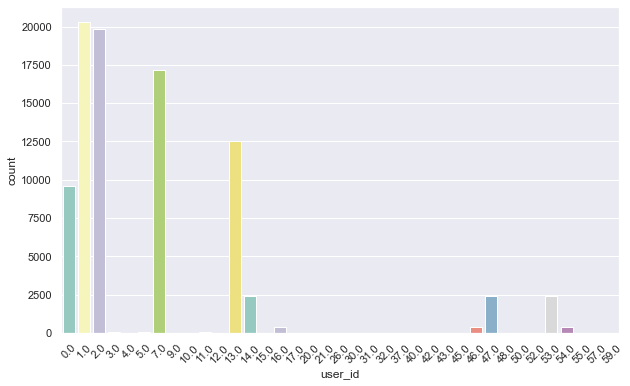

In [503]:
#Analysing the metioned features in descrption file
attributes = ['channel_id', 'timestamp', 'host_id', 'content_type', 'protocol', 'content_id',
 'geo_location', 'user_id']

for f in attributes:
    sns.countplot(x = f, data = dataset, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.savefig('f')
    plt.show()

In [673]:
#Checking for the outliers
pd.DataFrame.describe(dataset)

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
count,20566.000000,20566.000000,20566.000000,20566.000000,11.000000,20566.000000,20566.000000
mean,6.825294,145.978751,4.935768,0.980161,1650.272727,260.069629,6.743087
std,2.351914,26.100464,2.496116,0.139449,1173.302612,449.531491,8.457554
min,1.000000,0.000000,0.000000,0.000000,176.000000,0.000000,0.000000
25%,8.000000,156.000000,2.000000,1.000000,706.500000,1.000000,0.000000
50%,8.000000,156.000000,5.000000,1.000000,1460.000000,1.000000,3.000000
75%,8.000000,156.000000,8.000000,1.000000,2521.000000,370.000000,13.000000
max,8.000000,156.000000,8.000000,1.000000,3634.000000,1586.000000,59.000000


<AxesSubplot:>

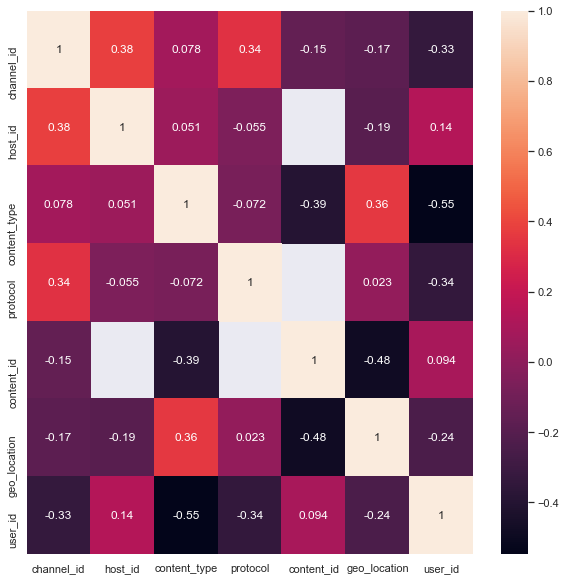

In [674]:
#Heat map to know the correlation between features
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot=True)

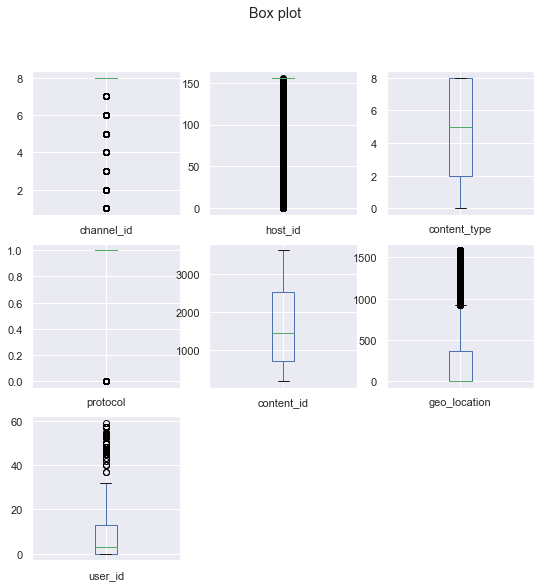

In [675]:
#Checking for outliers using box plot
import matplotlib.pyplot as plt
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box plot')
plt.savefig('Box plot1')
plt.show()

#### Handling the null values

In [676]:
updated_df=dataset

In [677]:
updated_df['user_id']=updated_df['user_id'].fillna(updated_df['user_id'].mean())

<ipython-input-677-16b0a8d9897f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['user_id']=updated_df['user_id'].fillna(updated_df['user_id'].mean())


In [678]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20566 entries, 0 to 88430
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    20566 non-null  int64  
 1   timestamp     20566 non-null  object 
 2   host_id       20566 non-null  int64  
 3   content_type  20566 non-null  int64  
 4   protocol      20566 non-null  int64  
 5   content_id    11 non-null     float64
 6   geo_location  20566 non-null  int64  
 7   user_id       20566 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.4+ MB


In [679]:
updated_df

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,8,5/13/2088 9:19,156,8,1,NaN,1303,0.0
1,8,5/13/2088 8:58,156,8,1,NaN,1514,0.0
2,8,5/13/2088 9:39,156,2,1,NaN,1,13.0
3,8,5/13/2088 9:54,156,8,1,NaN,1,0.0
4,8,5/13/2088 10:04,156,8,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...
88392,8,5/18/2088 22:02,156,2,1,NaN,1,13.0
88407,2,5/18/2088 22:12,123,4,1,NaN,0,7.0
88410,8,5/18/2088 23:42,156,8,1,NaN,1,0.0
88414,8,5/18/2088 22:28,156,8,1,NaN,1,0.0


In [680]:
updated_df.isnull().sum(axis = 0)

channel_id          0
timestamp           0
host_id             0
content_type        0
protocol            0
content_id      20555
geo_location        0
user_id             0
dtype: int64

In [681]:
updated_df=updated_df.drop(columns=['timestamp','content_id'])

In [682]:
print(updated_df.duplicated().sum())

18034


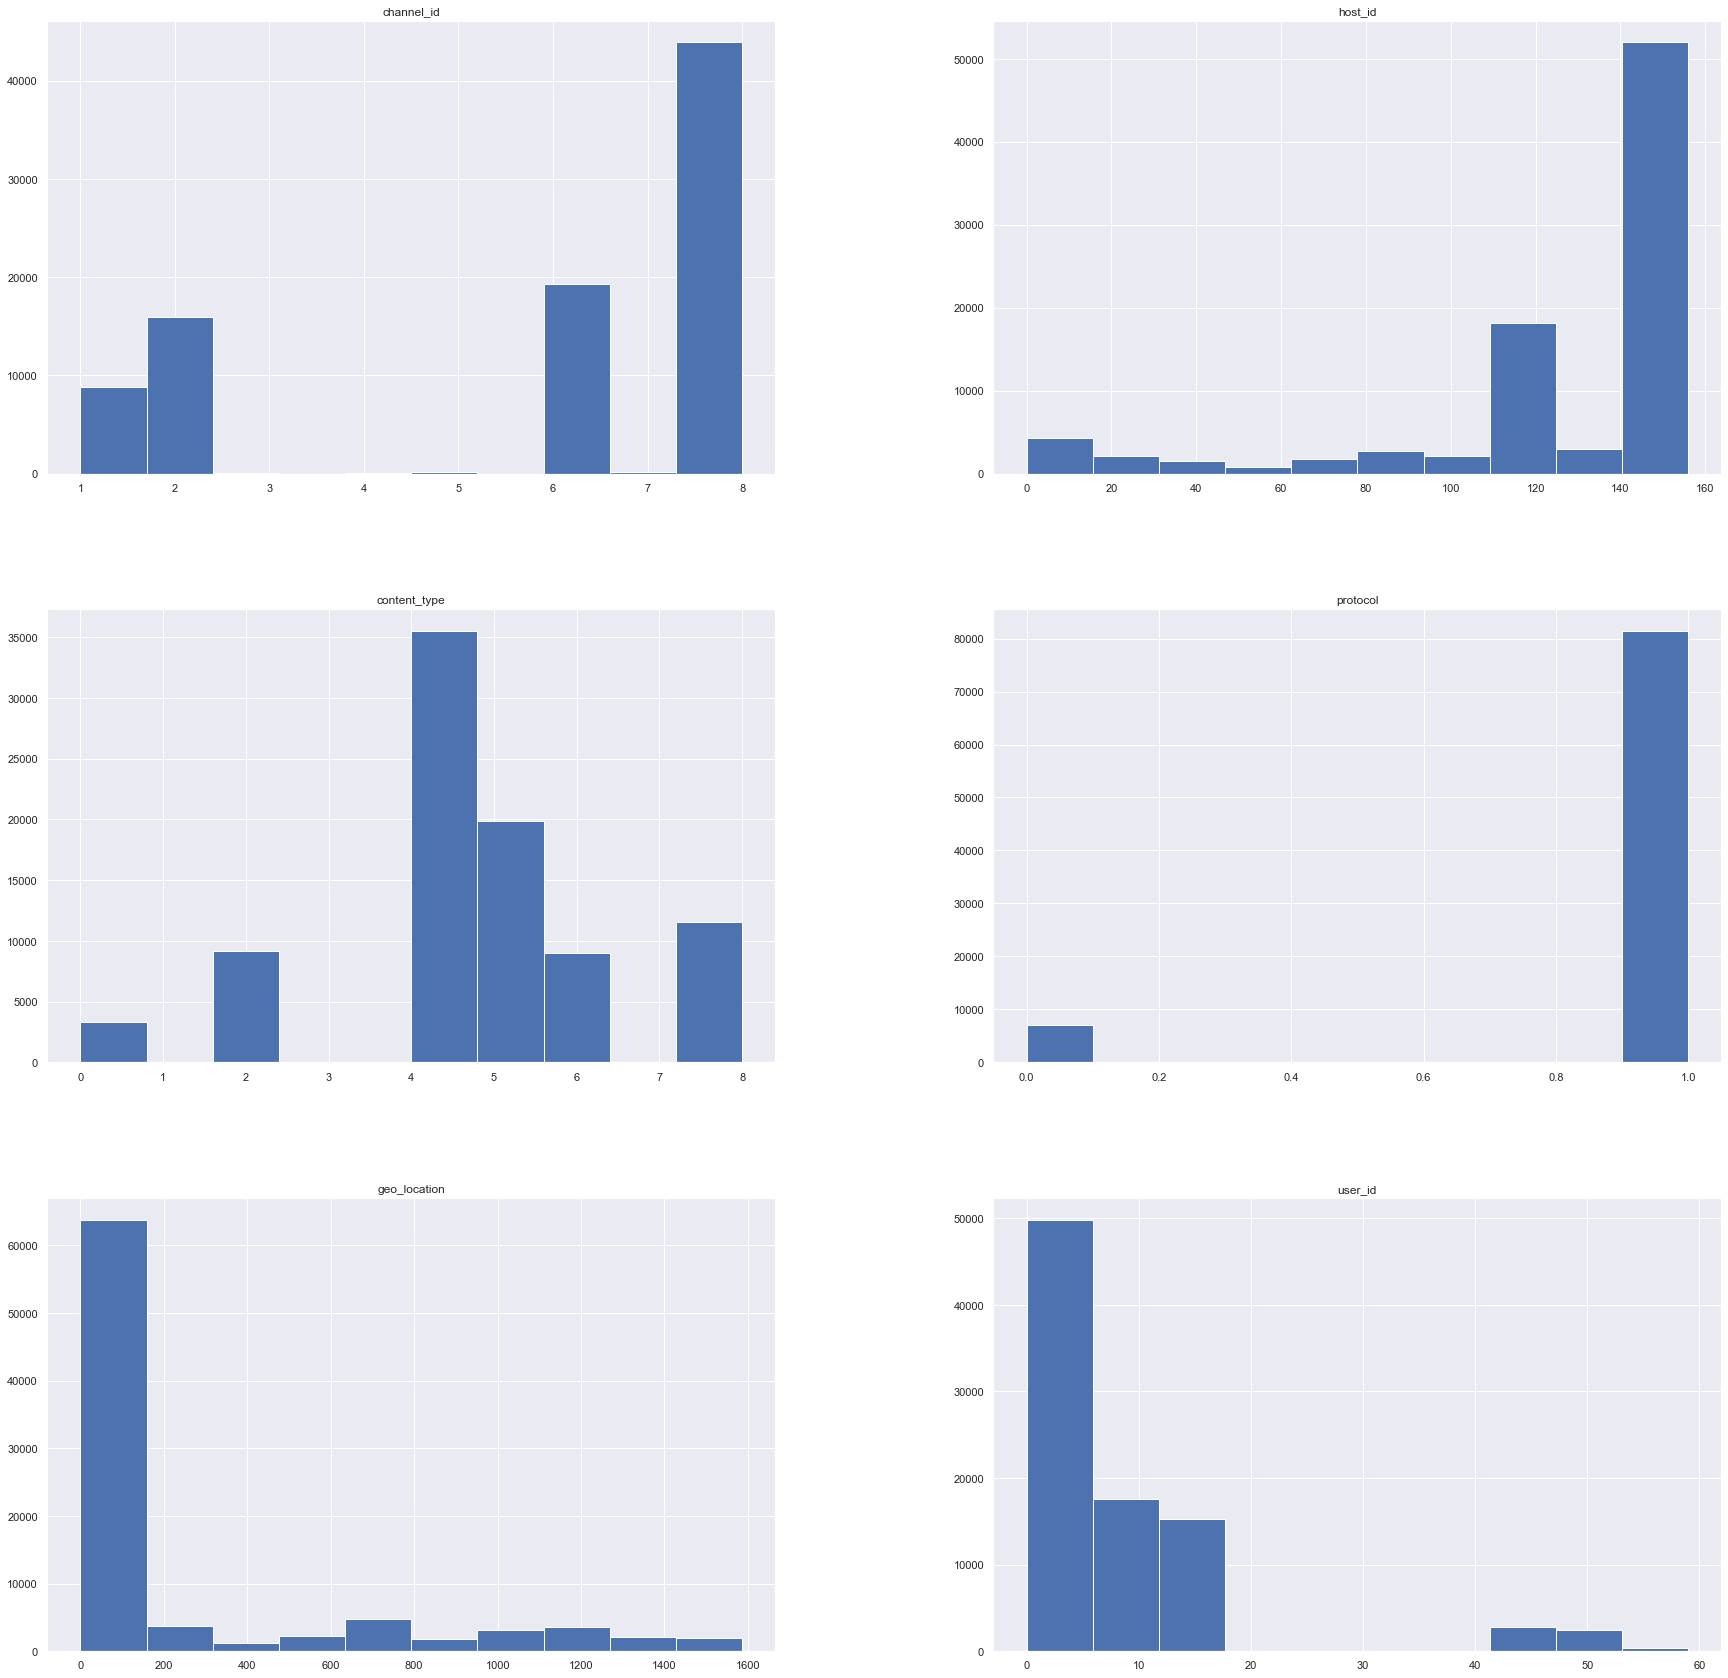

In [513]:
#Checking frequency of each attribute
updated_df.hist(figsize = (30,30))
plt.show()

In [683]:
Geo=updated_df['geo_location'].value_counts()

<AxesSubplot:>

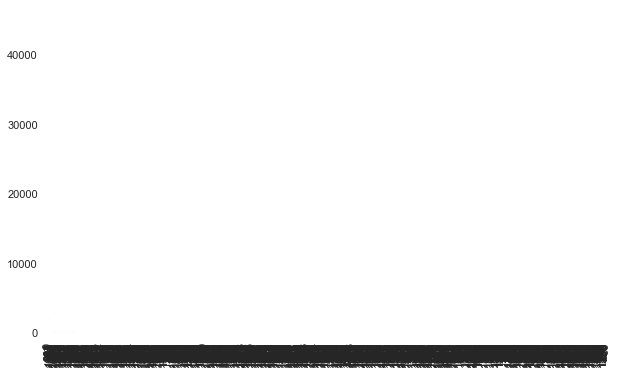

In [515]:
updated_df['geo_location'].value_counts().plot(kind='bar')

In [684]:
print(Geo.to_string())

1       11014
0        2753
285       247
1083      171
882       169
688       164
1135      124
548        90
1586       86
1254       84
569        76
161        75
1167       74
1185       70
326        68
169        65
167        63
499        52
675        48
595        47
211        46
370        45
185        43
1093       41
1177       41
1378       40
1221       40
1407       40
971        39
12         37
1064       35
102        35
48         33
1408       33
665        33
754        31
244        30
628        29
818        28
376        28
1488       27
644        25
101        25
1243       24
487        24
706        23
1157       23
1391       23
938        23
1397       22
616        22
585        21
429        21
1440       21
734        21
1514       20
1530       20
1512       20
1417       20
266        20
981        20
396        19
216        19
241        18
905        18
1134       18
361        18
816        17
498        17
802        17
851        17
1348  

In [685]:
updated_df2 = updated_df[updated_df['geo_location'].map(updated_df['geo_location'].value_counts()).gt(30)]

In [686]:
updated_df2['geo_location'].value_counts()

1       11014
0        2753
285       247
1083      171
882       169
688       164
1135      124
548        90
1586       86
1254       84
569        76
161        75
1167       74
1185       70
326        68
169        65
167        63
499        52
675        48
595        47
211        46
370        45
185        43
1093       41
1177       41
1378       40
1221       40
1407       40
971        39
12         37
102        35
1064       35
48         33
665        33
1408       33
754        31
Name: geo_location, dtype: int64

In [687]:
updated_df2

,channel_id,host_id,content_type,protocol,geo_location,user_id
2,8,156,2,1,1,13.0
3,8,156,8,1,1,0.0
4,8,156,8,1,1,0.0
5,8,156,2,1,1,13.0
6,8,156,5,1,1,2.0
...,...,...,...,...,...,...
88392,8,156,2,1,1,13.0
88407,2,123,4,1,0,7.0
88410,8,156,8,1,1,0.0
88414,8,156,8,1,1,0.0


In [688]:
updated_df2.nunique()

channel_id        8
host_id         139
content_type      9
protocol          2
geo_location     36
user_id          32
dtype: int64

In [689]:
Hosts=updated_df2['host_id'].value_counts()

<AxesSubplot:>

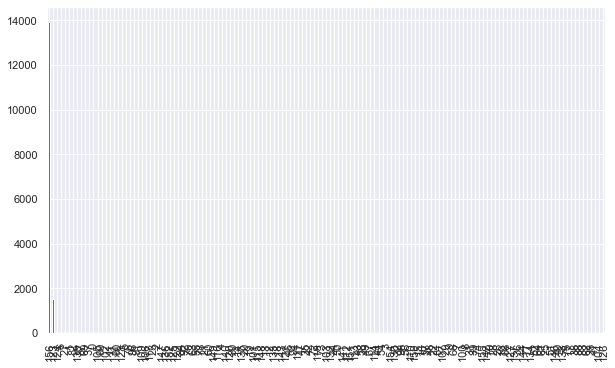

In [690]:
updated_df2['host_id'].value_counts().plot(kind='bar')

In [691]:
print(Hosts.to_string())

156    13905
123     1504
124       43
6         37
27        32
1         28
82        27
139       26
87        18
69        15
37        15
0         14
105       14
99        13
102       13
11        12
131       11
90        10
128       10
5         10
76         9
96         9
91         8
109        8
106        8
117        8
23         8
2          8
147        8
136        8
152        7
125        7
122        7
84         7
92         7
70         7
63         7
55         7
78         7
21         6
60         6
149        6
116        6
4          6
140        5
120        5
80         5
14         5
135        5
20         5
19         5
101        5
115        4
148        4
13         4
12         4
133        4
18         4
143        4
121        4
46         4
94         4
111        4
47         4
35         4
42         4
72         3
119        3
73         3
103        3
132        3
24         3
30         3
141        3
112        3
151        3
113        3

<AxesSubplot:>

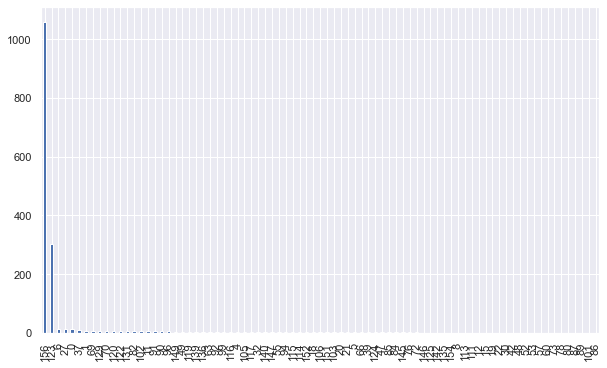

In [692]:
updated_df['host_id'][:1600].value_counts().plot(kind='bar')

## Hosts 0, 1 and 11 are top three hosts according to our requirements

In [693]:
#Hosts 0,1,11 are the top three hosts according to our requirements 

# Host 0

In [694]:
Host_0=updated_df2.loc[updated_df2['host_id'] == 0]

In [695]:
Host0_lb=updated_df2.loc[updated_df2['host_id'] == 0]

In [696]:
Host0_lb=Host0_lb.drop(columns=['host_id'])

In [697]:
Host_0

,channel_id,host_id,content_type,protocol,geo_location,user_id
221,6,0,4,1,1,1.0
255,6,0,4,1,1,1.0
261,6,0,4,1,1408,1.0
290,6,0,4,1,1,1.0
3123,6,0,4,1,882,1.0
4162,6,0,4,1,0,1.0
4191,5,0,4,1,1,1.0
4302,6,0,4,1,1408,1.0
9076,6,0,4,1,1407,1.0
10135,5,0,4,1,1,1.0


In [698]:
Host_0.nunique()

channel_id      2
host_id         1
content_type    1
protocol        1
geo_location    6
user_id         1
dtype: int64

In [699]:
#Host_0=Host_0.drop_duplicates()

In [700]:
Host_0

,channel_id,host_id,content_type,protocol,geo_location,user_id
221,6,0,4,1,1,1.0
255,6,0,4,1,1,1.0
261,6,0,4,1,1408,1.0
290,6,0,4,1,1,1.0
3123,6,0,4,1,882,1.0
4162,6,0,4,1,0,1.0
4191,5,0,4,1,1,1.0
4302,6,0,4,1,1408,1.0
9076,6,0,4,1,1407,1.0
10135,5,0,4,1,1,1.0


In [701]:
from sklearn.preprocessing import OneHotEncoder
Final_df1=pd.get_dummies(data=Host_0, columns=['channel_id','geo_location','content_type','protocol','user_id'])

In [702]:
Final_df1

,host_id,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0
221,0,0,1,0,1,0,0,0,0,1,1,1
255,0,0,1,0,1,0,0,0,0,1,1,1
261,0,0,1,0,0,0,0,0,1,1,1,1
290,0,0,1,0,1,0,0,0,0,1,1,1
3123,0,0,1,0,0,0,1,0,0,1,1,1
4162,0,0,1,1,0,0,0,0,0,1,1,1
4191,0,1,0,0,1,0,0,0,0,1,1,1
4302,0,0,1,0,0,0,0,0,1,1,1,1
9076,0,0,1,0,0,0,0,1,0,1,1,1
10135,0,1,0,0,1,0,0,0,0,1,1,1


In [703]:
Final_df1=Final_df1.drop(columns=['host_id'])

In [704]:
Final_df1

,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0
221,0,1,0,1,0,0,0,0,1,1,1
255,0,1,0,1,0,0,0,0,1,1,1
261,0,1,0,0,0,0,0,1,1,1,1
290,0,1,0,1,0,0,0,0,1,1,1
3123,0,1,0,0,0,1,0,0,1,1,1
4162,0,1,1,0,0,0,0,0,1,1,1
4191,1,0,0,1,0,0,0,0,1,1,1
4302,0,1,0,0,0,0,0,1,1,1,1
9076,0,1,0,0,0,0,1,0,1,1,1
10135,1,0,0,1,0,0,0,0,1,1,1


In [705]:
#from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'team' column 
#encoder_df1 = pd.DataFrame(encoder.fit_transform(Host0[['channel_id','host_id','content_type','protocol','geo_location','user_id']]).toarray())
#merge one-hot encoded columns back with original DataFrame
#final_df=pd.concat([encoder_df,km_df], axis='columns')

In [706]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

For 2 clusters the average silhouette_score is : 0.3575353723086811
For 3 clusters the average silhouette_score is : 0.36386918413004804
For 4 clusters the average silhouette_score is : 0.5011705982220555
For 5 clusters the average silhouette_score is : 0.619047619047619
For 6 clusters the average silhouette_score is : 0.6904761904761905


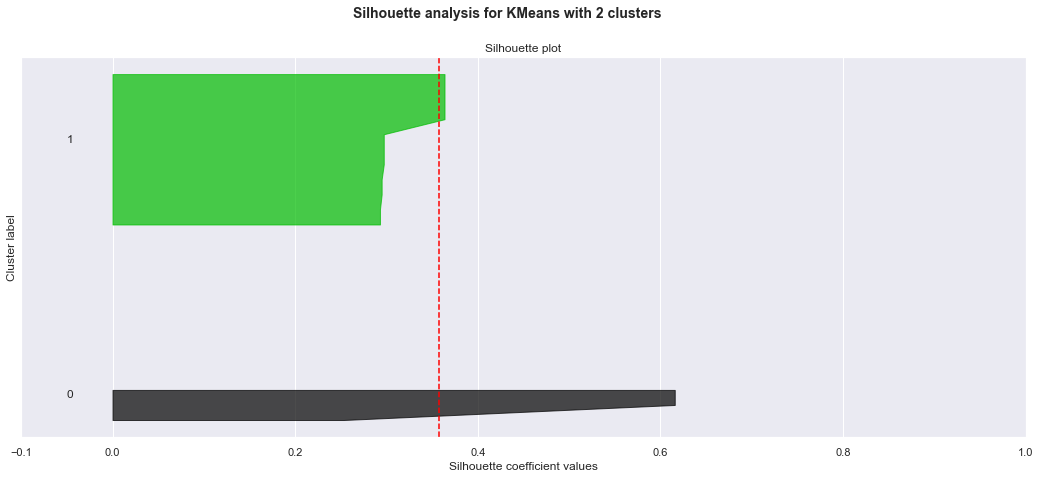

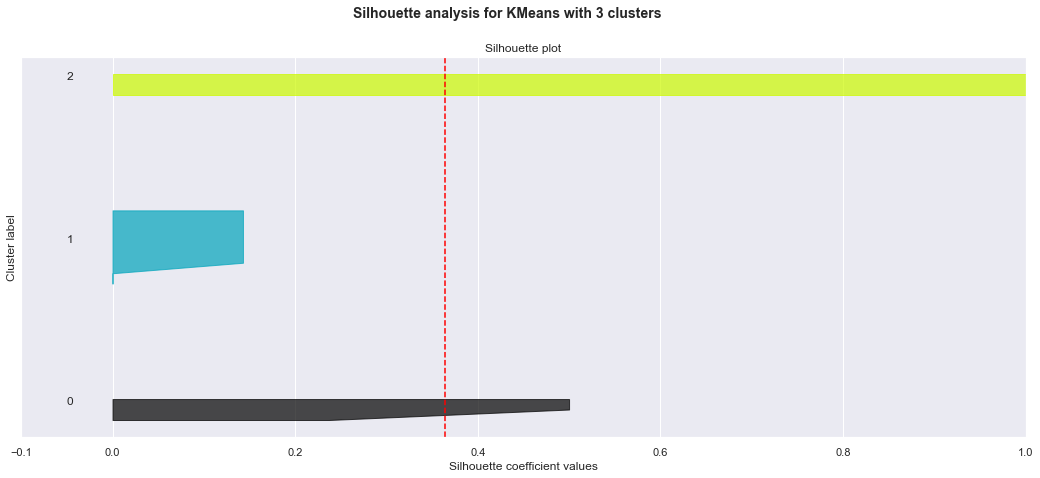

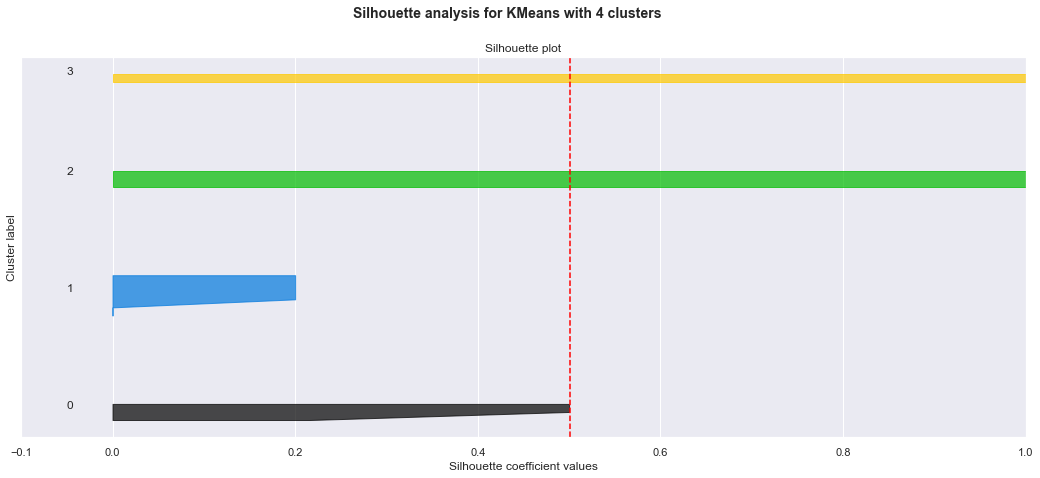

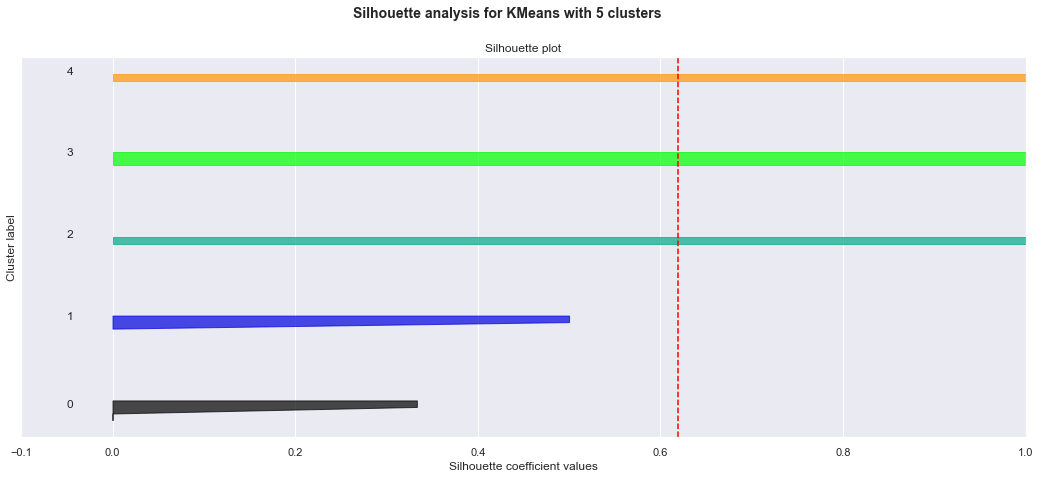

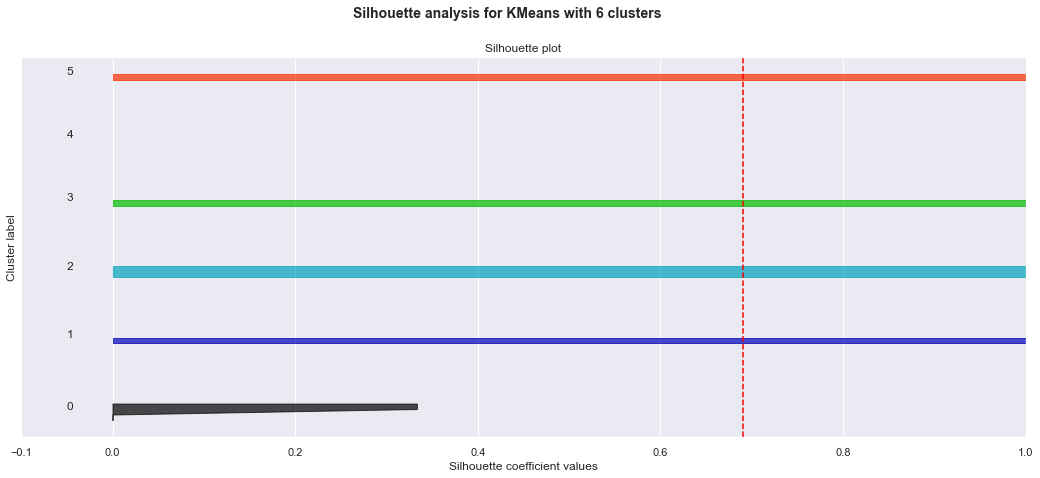

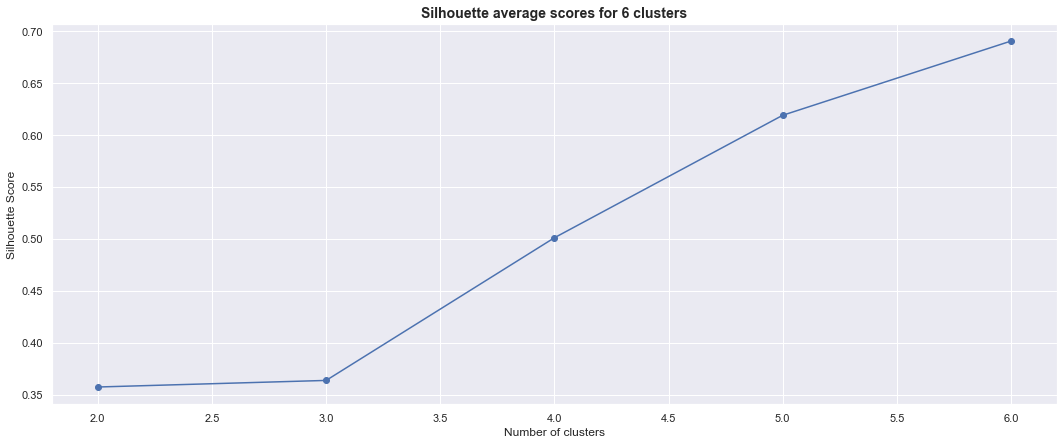

In [707]:
num_clusters = range(2,7) # we will analyse n_clusters from 2 to 7
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(Final_df1)

    labels_pred = kmeans.predict(Final_df1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(Final_df1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(Final_df1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
<ipython-input-708-db8aafe14b18>:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km.fit(Final_df1)


<Figure size 1080x504 with 0 Axes>

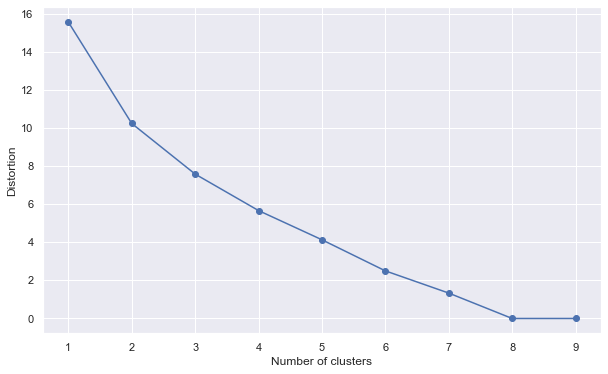

<Figure size 1080x504 with 0 Axes>

In [708]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'random', n_init = 20, max_iter = 300, tol = 1e-04, random_state = 40)
    km.fit(Final_df1)
    distortions.append(km.inertia_)

    
# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('kmeans')
plt.figure(figsize=(15,7))

In [709]:
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(Host_0)
labels_0 = kmeans.predict(Host_0)

In [710]:
Final_df1["Cluster_0"]= labels_0

In [711]:
Final_df1

,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0,Cluster_0
221,0,1,0,1,0,0,0,0,1,1,1,0
255,0,1,0,1,0,0,0,0,1,1,1,0
261,0,1,0,0,0,0,0,1,1,1,1,1
290,0,1,0,1,0,0,0,0,1,1,1,0
3123,0,1,0,0,0,1,0,0,1,1,1,1
4162,0,1,1,0,0,0,0,0,1,1,1,0
4191,1,0,0,1,0,0,0,0,1,1,1,0
4302,0,1,0,0,0,0,0,1,1,1,1,1
9076,0,1,0,0,0,0,1,0,1,1,1,1
10135,1,0,0,1,0,0,0,0,1,1,1,0


In [712]:
Final_df1.nunique()

channel_id_5         2
channel_id_6         2
geo_location_0       2
geo_location_1       2
geo_location_167     2
geo_location_882     2
geo_location_1407    2
geo_location_1408    2
content_type_4       1
protocol_1           1
user_id_1.0          1
Cluster_0            2
dtype: int64

In [714]:
X= Final_df1.iloc[:, :-1]     #X is matrix of features and Y is dependent vector
y= Final_df1.iloc[:, 11].values

In [715]:
X

,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0
221,0,1,0,1,0,0,0,0,1,1,1
255,0,1,0,1,0,0,0,0,1,1,1
261,0,1,0,0,0,0,0,1,1,1,1
290,0,1,0,1,0,0,0,0,1,1,1
3123,0,1,0,0,0,1,0,0,1,1,1
4162,0,1,1,0,0,0,0,0,1,1,1
4191,1,0,0,1,0,0,0,0,1,1,1
4302,0,1,0,0,0,0,0,1,1,1,1
9076,0,1,0,0,0,0,1,0,1,1,1
10135,1,0,0,1,0,0,0,0,1,1,1


In [716]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [717]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

## Decision tree classifier 

In [718]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [719]:
# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.8


In [720]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



array([[3, 1],
       [0, 1]], dtype=int64)

In [721]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6


In [722]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



array([[3, 1],
       [1, 0]], dtype=int64)

In [723]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [724]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 196 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [725]:
# checking the oob score
classifier_rf.oob_score_

0.8888888888888888

In [726]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [727]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [728]:
from sklearn.model_selection import GridSearchCV

In [729]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [730]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 30 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [731]:
grid_search.best_score_

0.5416666666666666

In [732]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=200, n_estimators=10,
                       n_jobs=-1, random_state=42)

## Host 1

In [733]:
Host_1=updated_df2.loc[updated_df2['host_id'] == 1]

In [734]:
Host1_lb=updated_df2.loc[updated_df2['host_id'] == 1]

In [735]:
Host1_lb=Host1_lb.drop(columns=['host_id'])

In [736]:
Host1_lb

,channel_id,content_type,protocol,geo_location,user_id
193,6,4,1,1,1.0
268,6,4,1,1,1.0
291,6,4,1,1,1.0
1306,6,4,1,0,1.0
2192,6,4,1,167,1.0
3223,6,4,1,0,1.0
4291,6,4,1,0,1.0
5231,6,4,1,1254,1.0
5355,6,4,1,167,1.0
6904,8,8,1,1,1.0


In [737]:
Host_1.nunique()

channel_id      3
host_id         1
content_type    2
protocol        1
geo_location    5
user_id         1
dtype: int64

In [738]:
#Host_1=Host_1.drop_duplicates()

In [739]:
Host_1

,channel_id,host_id,content_type,protocol,geo_location,user_id
193,6,1,4,1,1,1.0
268,6,1,4,1,1,1.0
291,6,1,4,1,1,1.0
1306,6,1,4,1,0,1.0
2192,6,1,4,1,167,1.0
3223,6,1,4,1,0,1.0
4291,6,1,4,1,0,1.0
5231,6,1,4,1,1254,1.0
5355,6,1,4,1,167,1.0
6904,8,1,8,1,1,1.0


In [740]:
from sklearn.preprocessing import OneHotEncoder
Final_df2=pd.get_dummies(data=Host_1, columns=['channel_id','content_type','geo_location','protocol','user_id'])

In [741]:
Final_df2

,host_id,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_754,geo_location_1254,protocol_1,user_id_1.0
193,1,0,1,0,1,0,0,1,0,0,0,1,1
268,1,0,1,0,1,0,0,1,0,0,0,1,1
291,1,0,1,0,1,0,0,1,0,0,0,1,1
1306,1,0,1,0,1,0,1,0,0,0,0,1,1
2192,1,0,1,0,1,0,0,0,1,0,0,1,1
3223,1,0,1,0,1,0,1,0,0,0,0,1,1
4291,1,0,1,0,1,0,1,0,0,0,0,1,1
5231,1,0,1,0,1,0,0,0,0,0,1,1,1
5355,1,0,1,0,1,0,0,0,1,0,0,1,1
6904,1,0,0,1,0,1,0,1,0,0,0,1,1


In [742]:
Final_df2=Final_df2.drop(columns=['host_id'])

In [743]:
Final_df2

,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_754,geo_location_1254,protocol_1,user_id_1.0
193,0,1,0,1,0,0,1,0,0,0,1,1
268,0,1,0,1,0,0,1,0,0,0,1,1
291,0,1,0,1,0,0,1,0,0,0,1,1
1306,0,1,0,1,0,1,0,0,0,0,1,1
2192,0,1,0,1,0,0,0,1,0,0,1,1
3223,0,1,0,1,0,1,0,0,0,0,1,1
4291,0,1,0,1,0,1,0,0,0,0,1,1
5231,0,1,0,1,0,0,0,0,0,1,1,1
5355,0,1,0,1,0,0,0,1,0,0,1,1
6904,0,0,1,0,1,0,1,0,0,0,1,1


In [744]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

For 2 clusters the average silhouette_score is : 0.5849241485017976
For 3 clusters the average silhouette_score is : 0.5824169022009962
For 4 clusters the average silhouette_score is : 0.5990752490344448
For 5 clusters the average silhouette_score is : 0.6949955037304141
For 6 clusters the average silhouette_score is : 0.7138557589415209


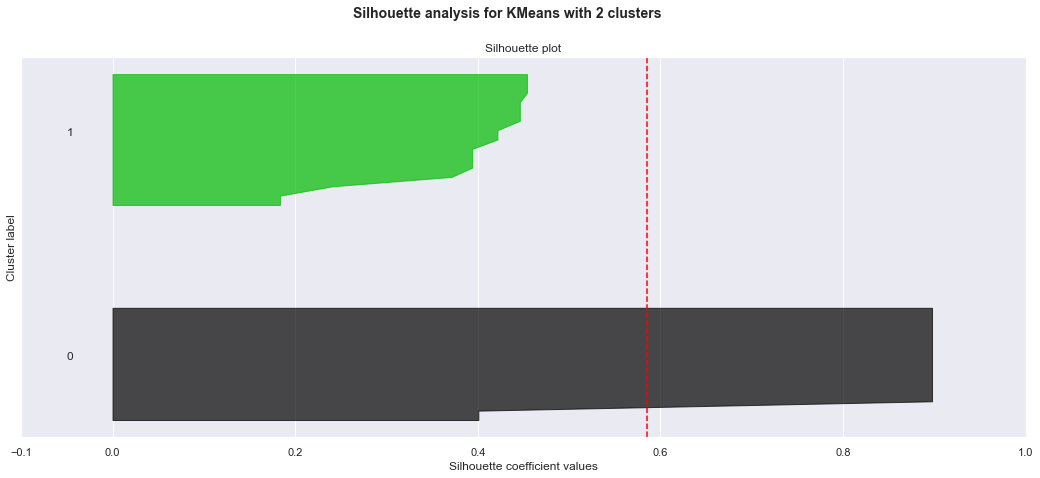

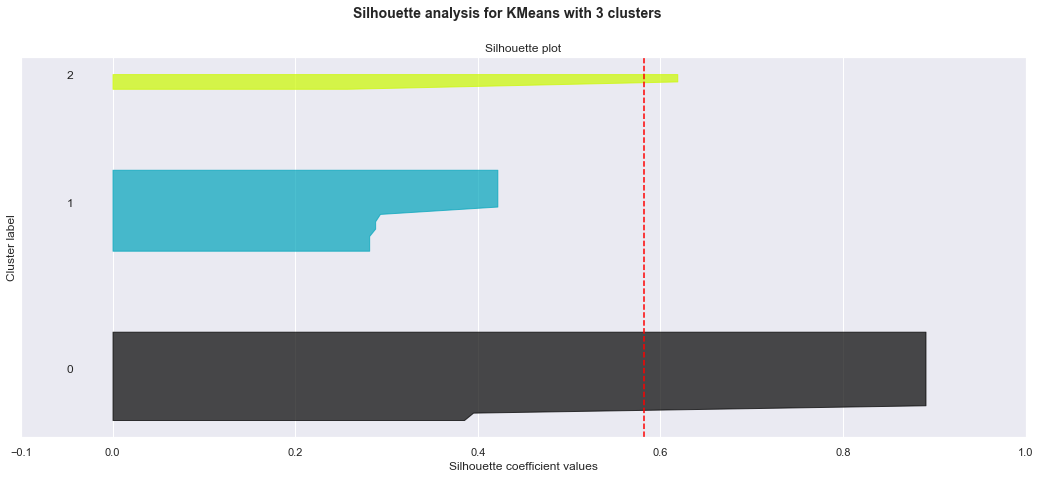

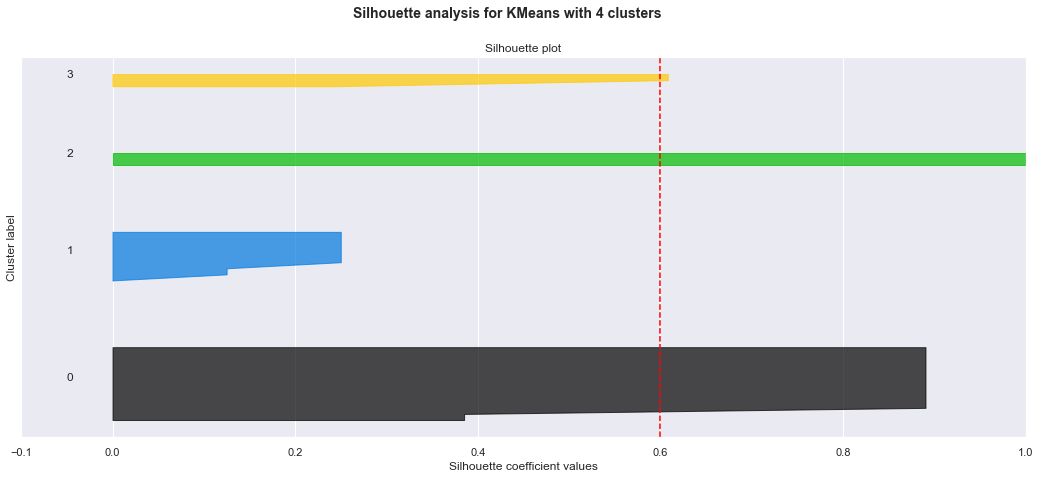

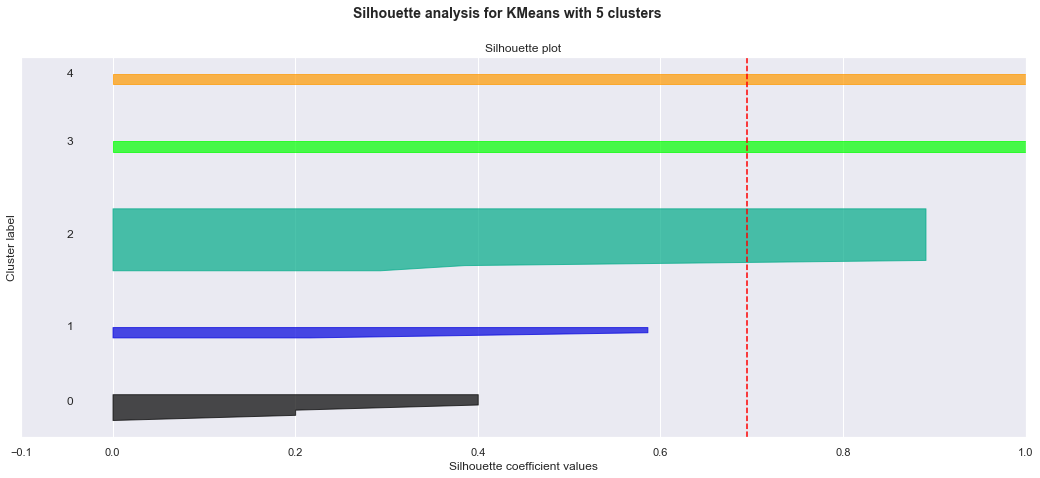

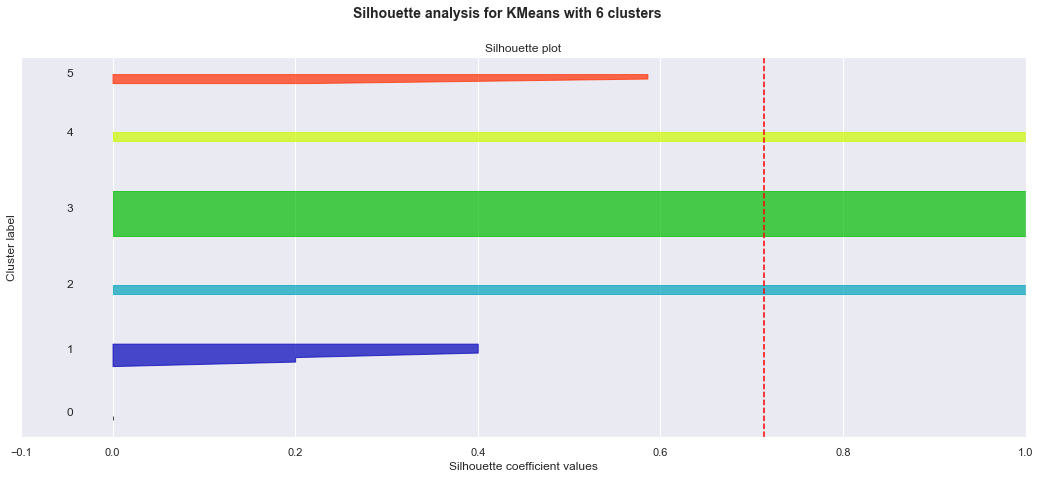

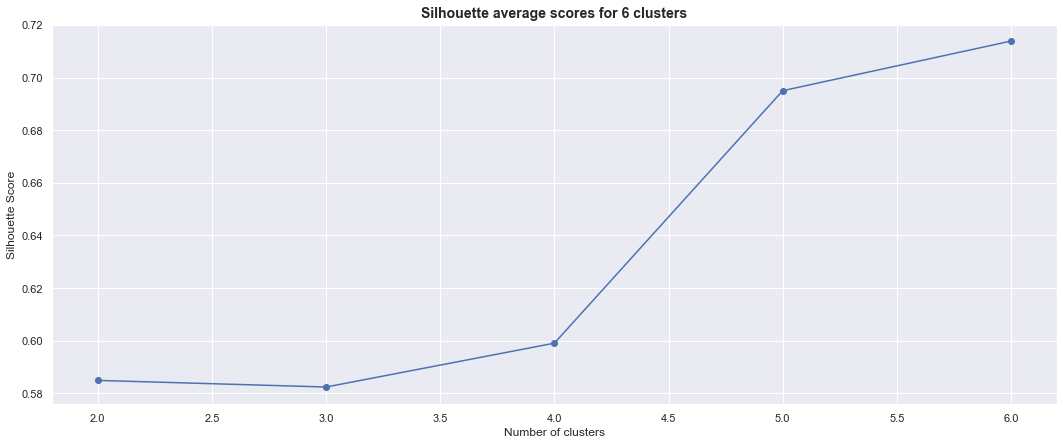

In [745]:
num_clusters = range(2,7) # we will analyse n_clusters from 2 to 7
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(Final_df2)

    labels_pred = kmeans.predict(Final_df2)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(Final_df2, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(Final_df2, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1080x504 with 0 Axes>

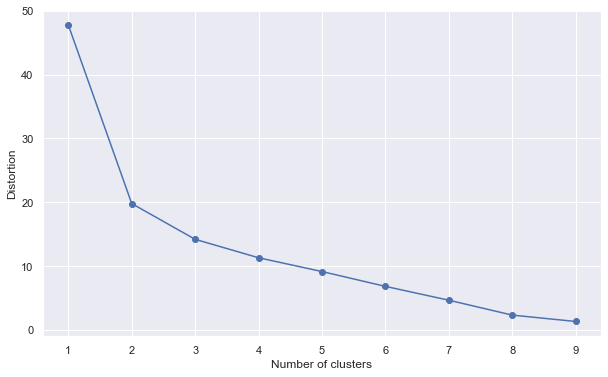

<Figure size 1080x504 with 0 Axes>

In [746]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'random', n_init = 20, max_iter = 300, tol = 1e-04, random_state = 40)
    km.fit(Final_df2)
    distortions.append(km.inertia_)

    
# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('kmeans')
plt.figure(figsize=(15,7))

In [747]:
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(Host_1)
labels_1 = kmeans.predict(Host_1)

In [748]:
Final_df2["Cluster_1"]= labels_1

In [749]:
#Final_df2=Final_df2.drop(columns=['Cluster_0'])

In [750]:
Final_df2

,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_754,geo_location_1254,protocol_1,user_id_1.0,Cluster_1
193,0,1,0,1,0,0,1,0,0,0,1,1,0
268,0,1,0,1,0,0,1,0,0,0,1,1,0
291,0,1,0,1,0,0,1,0,0,0,1,1,0
1306,0,1,0,1,0,1,0,0,0,0,1,1,0
2192,0,1,0,1,0,0,0,1,0,0,1,1,0
3223,0,1,0,1,0,1,0,0,0,0,1,1,0
4291,0,1,0,1,0,1,0,0,0,0,1,1,0
5231,0,1,0,1,0,0,0,0,0,1,1,1,1
5355,0,1,0,1,0,0,0,1,0,0,1,1,0
6904,0,0,1,0,1,0,1,0,0,0,1,1,0


In [751]:
Final_df2.nunique()

channel_id_5         2
channel_id_6         2
channel_id_8         2
content_type_4       2
content_type_8       2
geo_location_0       2
geo_location_1       2
geo_location_167     2
geo_location_754     2
geo_location_1254    2
protocol_1           1
user_id_1.0          1
Cluster_1            2
dtype: int64

In [752]:
X= Final_df2.iloc[:, :-1]     #X is matrix of features and Y is dependent vector
y= Final_df2.iloc[:, 12].values

In [753]:
X

,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_754,geo_location_1254,protocol_1,user_id_1.0
193,0,1,0,1,0,0,1,0,0,0,1,1
268,0,1,0,1,0,0,1,0,0,0,1,1
291,0,1,0,1,0,0,1,0,0,0,1,1
1306,0,1,0,1,0,1,0,0,0,0,1,1
2192,0,1,0,1,0,0,0,1,0,0,1,1
3223,0,1,0,1,0,1,0,0,0,0,1,1
4291,0,1,0,1,0,1,0,0,0,0,1,1
5231,0,1,0,1,0,0,0,0,0,1,1,1
5355,0,1,0,1,0,0,0,1,0,0,1,1
6904,0,0,1,0,1,0,1,0,0,0,1,1


In [754]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0])

In [755]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

In [756]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [757]:
# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.8888888888888888


In [758]:
print(classification_report(y_test, predicted))
confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



array([[7, 0],
       [1, 1]], dtype=int64)

In [759]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8888888888888888


In [760]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



array([[7, 0],
       [1, 1]], dtype=int64)

In [761]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [762]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 180 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [763]:
# checking the oob score
classifier_rf.oob_score_

0.8947368421052632

In [764]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [765]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [766]:
from sklearn.model_selection import GridSearchCV

In [767]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [768]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\shahi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 27.4 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [769]:
grid_search.best_score_

0.8500000000000001

In [820]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

## Host 11

In [771]:
Host_11

,channel_id,host_id,content_type,protocol,geo_location,user_id
196,6,11,4,1,1,1.0
350,6,11,4,1,1457,1.0
1298,6,11,4,1,396,1.0
3840,8,11,8,1,1,1.0
8884,8,11,8,1,0,1.0
10608,8,11,8,1,498,1.0
16265,8,11,8,1,1221,1.0


In [772]:
Host_11=updated_df2.loc[updated_df2['host_id'] == 11]

In [773]:
Host_11

,channel_id,host_id,content_type,protocol,geo_location,user_id
196,6,11,4,1,1,1.0
245,6,11,4,1,1,1.0
3840,8,11,8,1,1,1.0
6049,8,11,8,1,1,1.0
7377,8,11,8,1,1,1.0
8250,6,11,4,1,1,1.0
8884,8,11,8,1,0,1.0
14836,8,11,8,1,1,1.0
16265,8,11,8,1,1221,1.0
30403,8,11,8,1,1,1.0


In [774]:
Host11_lb=updated_df2.loc[updated_df2['host_id'] == 11]

In [775]:
Host11_lb=Host11_lb.drop(columns=['host_id'])

In [776]:
Host11_lb

,channel_id,content_type,protocol,geo_location,user_id
196,6,4,1,1,1.0
245,6,4,1,1,1.0
3840,8,8,1,1,1.0
6049,8,8,1,1,1.0
7377,8,8,1,1,1.0
8250,6,4,1,1,1.0
8884,8,8,1,0,1.0
14836,8,8,1,1,1.0
16265,8,8,1,1221,1.0
30403,8,8,1,1,1.0


In [777]:
Host11_lb.nunique()

channel_id      2
content_type    2
protocol        1
geo_location    3
user_id         1
dtype: int64

In [778]:
#Host_11=Host_11.drop_duplicates()

In [779]:
Host_11

,channel_id,host_id,content_type,protocol,geo_location,user_id
196,6,11,4,1,1,1.0
245,6,11,4,1,1,1.0
3840,8,11,8,1,1,1.0
6049,8,11,8,1,1,1.0
7377,8,11,8,1,1,1.0
8250,6,11,4,1,1,1.0
8884,8,11,8,1,0,1.0
14836,8,11,8,1,1,1.0
16265,8,11,8,1,1221,1.0
30403,8,11,8,1,1,1.0


In [780]:
from sklearn.preprocessing import OneHotEncoder
Final_df3=pd.get_dummies(data=Host_11, columns=['channel_id','content_type','geo_location','protocol','user_id'])

In [781]:
Final_df3

,host_id,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_1221,protocol_1,user_id_1.0
196,11,1,0,1,0,0,1,0,1,1
245,11,1,0,1,0,0,1,0,1,1
3840,11,0,1,0,1,0,1,0,1,1
6049,11,0,1,0,1,0,1,0,1,1
7377,11,0,1,0,1,0,1,0,1,1
8250,11,1,0,1,0,0,1,0,1,1
8884,11,0,1,0,1,1,0,0,1,1
14836,11,0,1,0,1,0,1,0,1,1
16265,11,0,1,0,1,0,0,1,1,1
30403,11,0,1,0,1,0,1,0,1,1


In [782]:
Final_df3.nunique()

host_id              1
channel_id_6         2
channel_id_8         2
content_type_4       2
content_type_8       2
geo_location_0       2
geo_location_1       2
geo_location_1221    2
protocol_1           1
user_id_1.0          1
dtype: int64

In [783]:
Final_df3=Final_df3.drop(columns=['host_id'])

In [784]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

For 2 clusters the average silhouette_score is : 0.8006552162120242
For 3 clusters the average silhouette_score is : 0.8333333333333334
For 4 clusters the average silhouette_score is : 0.8333333333333334
For 5 clusters the average silhouette_score is : 0.8333333333333334


<ipython-input-785-e365eaa36262>:14: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(Final_df3)


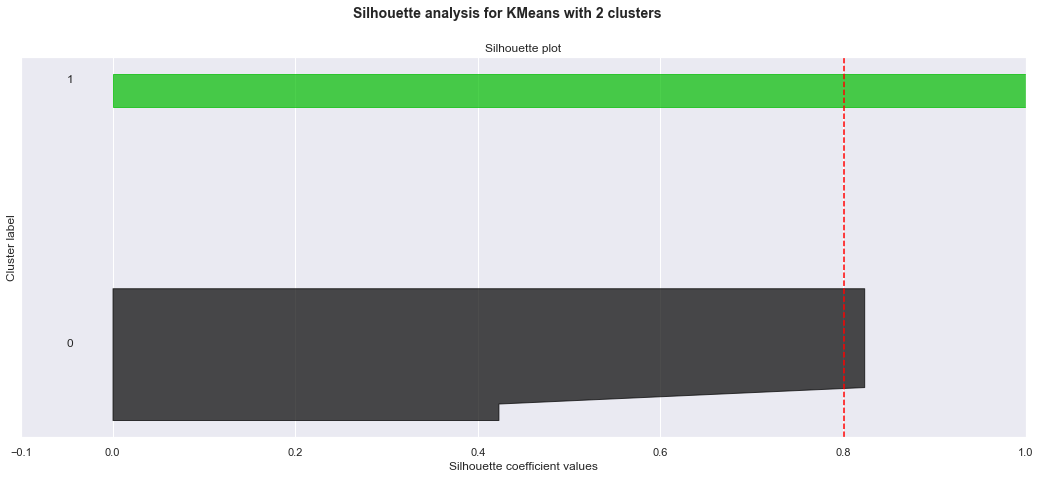

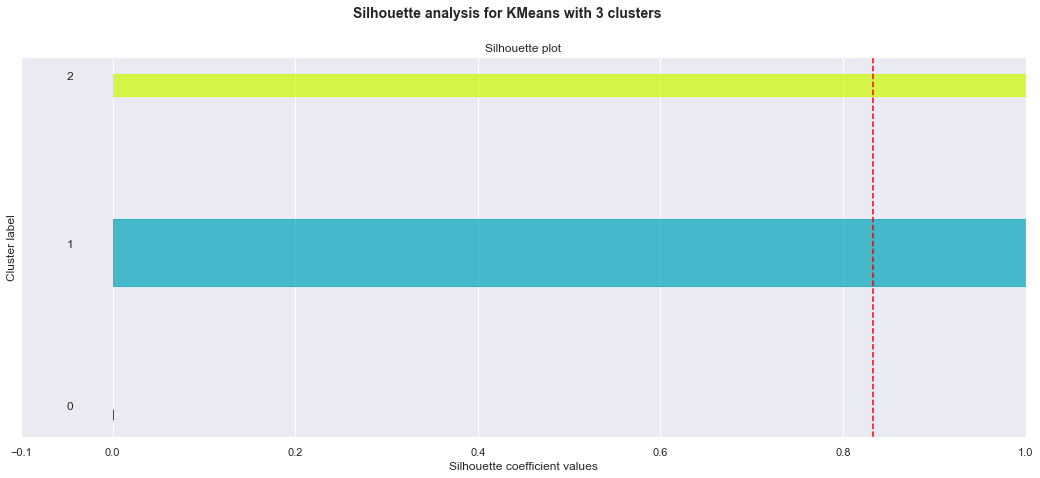

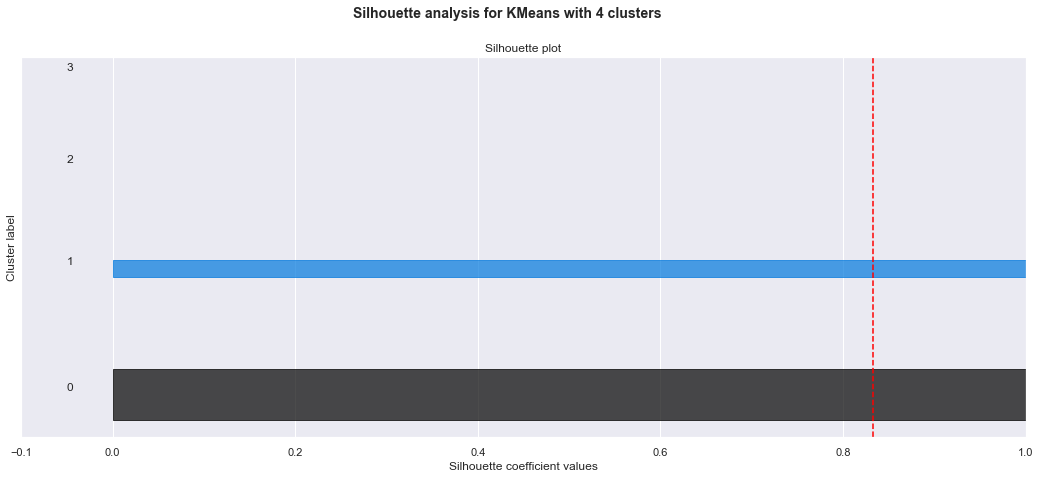

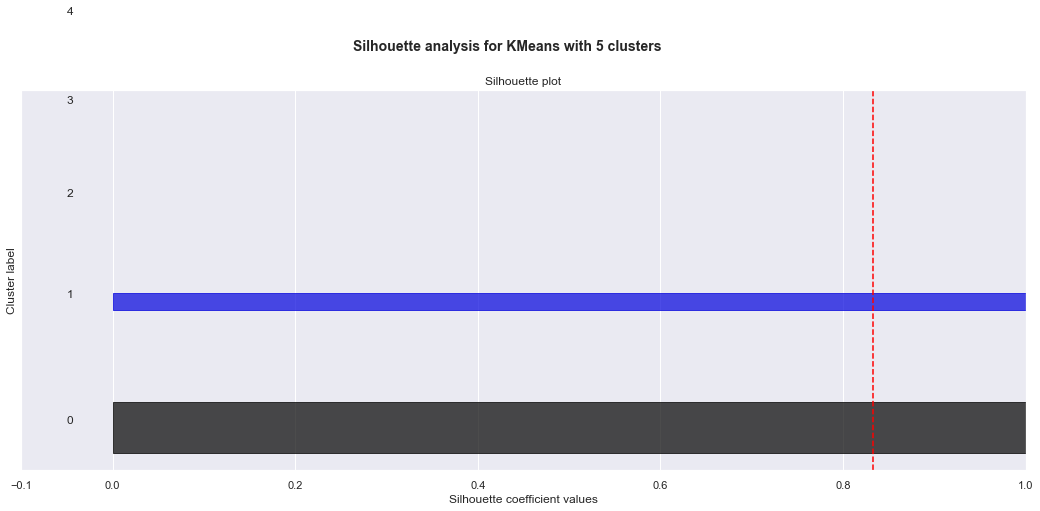

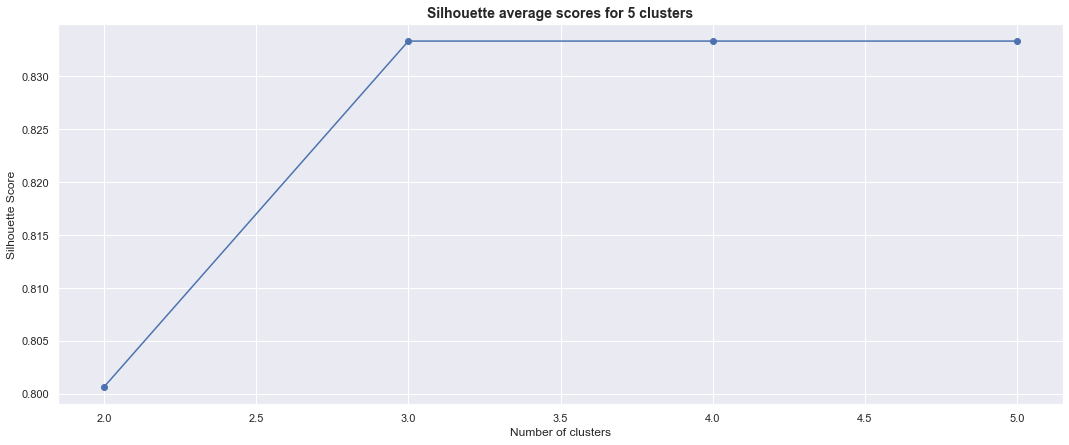

In [785]:
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 7
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(Final_df3)

    labels_pred = kmeans.predict(Final_df3)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(Final_df3, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(Final_df3, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
<ipython-input-786-893242b040f9>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  km.fit(Final_df3)
<ipython-input-786-893242b040f9>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  km.fit(Final_df3)


<Figure size 1080x504 with 0 Axes>

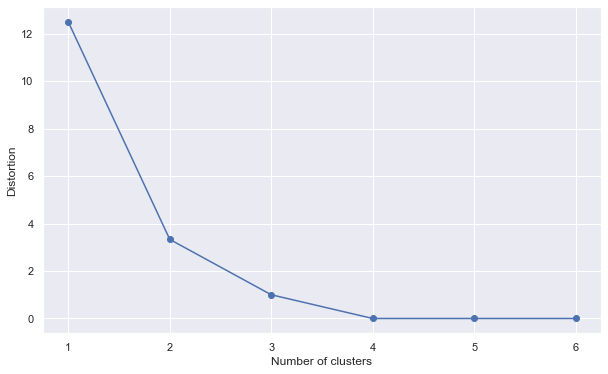

<Figure size 1080x504 with 0 Axes>

In [786]:
distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters = i, init = 'random', n_init = 20, max_iter = 300, tol = 1e-04, random_state = 40)
    km.fit(Final_df3)
    distortions.append(km.inertia_)

    
# plot
plt.plot(range(1, 7), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('kmeans')
plt.figure(figsize=(15,7))

In [787]:
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(Host_11)
labels_11 = kmeans.predict(Host_11)

In [788]:
Final_df3["Cluster_11"]= labels_11

In [789]:
Final_df3

,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_1221,protocol_1,user_id_1.0,Cluster_11
196,1,0,1,0,0,1,0,1,1,0
245,1,0,1,0,0,1,0,1,1,0
3840,0,1,0,1,0,1,0,1,1,0
6049,0,1,0,1,0,1,0,1,1,0
7377,0,1,0,1,0,1,0,1,1,0
8250,1,0,1,0,0,1,0,1,1,0
8884,0,1,0,1,1,0,0,1,1,0
14836,0,1,0,1,0,1,0,1,1,0
16265,0,1,0,1,0,0,1,1,1,1
30403,0,1,0,1,0,1,0,1,1,0


In [791]:
Final_df3.nunique()

channel_id_6         2
channel_id_8         2
content_type_4       2
content_type_8       2
geo_location_0       2
geo_location_1       2
geo_location_1221    2
protocol_1           1
user_id_1.0          1
Cluster_11           2
dtype: int64

In [799]:
X= Final_df3.iloc[:, :-1]     #X is matrix of features and Y is dependent vector
y= Final_df3.iloc[:, 9].values

In [800]:
X

,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_1221,protocol_1,user_id_1.0
196,1,0,1,0,0,1,0,1,1
245,1,0,1,0,0,1,0,1,1
3840,0,1,0,1,0,1,0,1,1
6049,0,1,0,1,0,1,0,1,1
7377,0,1,0,1,0,1,0,1,1
8250,1,0,1,0,0,1,0,1,1
8884,0,1,0,1,1,0,0,1,1
14836,0,1,0,1,0,1,0,1,1
16265,0,1,0,1,0,0,1,1,1
30403,0,1,0,1,0,1,0,1,1


In [801]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [802]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

## Decision tree classifier

In [803]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [804]:
# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 1.0


In [805]:
print(classification_report(y_test, predicted))#zero_division=1
confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



array([[4]], dtype=int64)

In [806]:
from sklearn.ensemble import RandomForestClassifier
#creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


In [807]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



array([[4]], dtype=int64)

In [808]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [809]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 185 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [810]:
# checking the oob score
classifier_rf.oob_score_

0.875

In [811]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [812]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [813]:
from sklearn.model_selection import GridSearchCV

In [814]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [815]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\shahi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


Wall time: 26.8 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [816]:
grid_search.best_score_

0.875

In [817]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)